# Basic

In [59]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

## DataFrame

In [60]:
#importing the dataset
Data = pd.read_csv('eighteen_nineteen_university_datasets.csv', encoding='unicode_escape')
# here we convert Data to DataFrame
df = pd.DataFrame(Data)
# we call the df
df

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Aga Khan University,Pakistan,3,-,> 1000,-,> 1000,> 1000,464,673,69.8
996,997,University of Calcutta,India,17,353,716,296,798,966,> 1000,> 1000,69.8
997,998,K?chi University,Japan,56,-,> 1000,-,> 1000,> 1000,811,673,69.8
998,999,Soonchunhyang University,South Korea,35,-,> 1000,-,881,> 1000,> 1000,898,69.8


In [61]:
# check the shap of data
df.shape

(1000, 12)

We have a 1000 in 12 DataSet

In [62]:
# we want to have the Dtype and Null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National Rank         1000 non-null   int64  
 4   Quality of Education  1000 non-null   object 
 5   Alumni Employment     1000 non-null   object 
 6   Quality of Faculty    1000 non-null   object 
 7   Research Output       1000 non-null   object 
 8   Quality Publications  1000 non-null   object 
 9   Influence             1000 non-null   object 
 10  Citations             1000 non-null   object 
 11  Score                 1000 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 93.9+ KB


we have to change some columns to float values 

In [63]:
# here we get the describtion of data and other values
df.describe(include='all')

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
count,1000.000000,1000,1000,1000.00000,1000,1000,1000,1000,1000,1000,1000,1000.000000
unique,NaN,1000,61,NaN,404,492,221,905,892,830,75,NaN
top,NaN,Harvard University,USA,NaN,-,> 1000,-,> 1000,> 1000,> 1000,898,NaN
freq,NaN,1,213,NaN,597,509,731,77,51,171,129,NaN
mean,500.500000,NaN,NaN,40.02300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.034300
std,288.819436,NaN,NaN,49.22871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.670858
min,1.000000,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.800000
25%,250.750000,NaN,NaN,6.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.500000
50%,500.500000,NaN,NaN,21.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.750000
75%,750.250000,NaN,NaN,51.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.300000


we don't have missing values, but as we see there are values with - and > 1000 in data

In [64]:
# we want to know how many we have from a specific value
df.eq("-").sum()

World Rank                0
Institution               0
Location                  0
National Rank             0
Quality of Education    597
Alumni Employment         0
Quality of Faculty      731
Research Output           0
Quality Publications      0
Influence                 0
Citations                 0
Score                     0
dtype: int64

two Quality of Education and Quality of Faculty heve the most '-' values and they are most of the dataset so we can't just delete them.

In [65]:
# changing the '-' values to Nan
df.replace('-', np.nan, inplace=True)

In [66]:
df.eq('> 1000').sum()

World Rank                0
Institution               0
Location                  0
National Rank             0
Quality of Education      0
Alumni Employment       509
Quality of Faculty        0
Research Output          77
Quality Publications     51
Influence               171
Citations               110
Score                     0
dtype: int64

we will replace > 1000 values with the 1001 value

In [67]:
# changing the '> 1000' values to 1001
df.replace('> 1000', "1001", inplace=True)

In [68]:
# number of missing values
df.isnull().sum()

World Rank                0
Institution               0
Location                  0
National Rank             0
Quality of Education    597
Alumni Employment         0
Quality of Faculty      731
Research Output           0
Quality Publications      0
Influence                 0
Citations                 0
Score                     0
dtype: int64

now we have total of 1,328 missing values

In [69]:
# we check the columns names< because we get errors
for col in df.columns:
    print(repr(col))

'World Rank'
'Institution'
'Location'
'National Rank'
'Quality\xa0of Education'
'Alumni Employment'
'Quality\xa0of Faculty'
'Research Output'
'Quality Publications'
'Influence'
'Citations'
'Score'


we have to rename 2 of the column names because they have incorrect words

In [70]:
# here we rename the columns
df.rename(columns={'Quality\xa0of Education': 'Quality of Education','Quality\xa0of Faculty': 'Quality of Faculty'}, inplace=True)

In [71]:
#check the columns names< because we get errors
for col in df.columns:
    print(repr(col))

'World Rank'
'Institution'
'Location'
'National Rank'
'Quality of Education'
'Alumni Employment'
'Quality of Faculty'
'Research Output'
'Quality Publications'
'Influence'
'Citations'
'Score'


now the names are allright

In [72]:
# check for duplicated values
df.duplicated().sum()

0

there are no duplicated values

In [73]:
# changing type of columns to float
df[['National Rank', 'Quality of Education','Alumni Employment','Quality of Faculty', 'Research Output', 'Quality Publications','Influence', 'Citations' ]] = df[['National Rank', 'Quality of Education','Alumni Employment','Quality of Faculty', 'Research Output', 'Quality Publications','Influence', 'Citations' ]].astype(float)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National Rank         1000 non-null   float64
 4   Quality of Education  403 non-null    float64
 5   Alumni Employment     1000 non-null   float64
 6   Quality of Faculty    269 non-null    float64
 7   Research Output       1000 non-null   float64
 8   Quality Publications  1000 non-null   float64
 9   Influence             1000 non-null   float64
 10  Citations             1000 non-null   float64
 11  Score                 1000 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 93.9+ KB


# Noise handling

Because it's a ranking dataset, the diffrences could be just grading.

# Missing Value

In [75]:
# number of missing values
df.isnull().sum()

World Rank                0
Institution               0
Location                  0
National Rank             0
Quality of Education    597
Alumni Employment         0
Quality of Faculty      731
Research Output           0
Quality Publications      0
Influence                 0
Citations                 0
Score                     0
dtype: int64

we just have 2 columns with missig value. we will replace them with them with (Max + 1) value of each column.

In [76]:
# getting the max number of column
df['Quality of Education'].max()

666.0

In [77]:
# getting the max number of column
df['Quality of Faculty'].max()

303.0

In [78]:
values = {'Quality of Education': 667.0,'Quality of Faculty':304.0 } # setting the values
df1 = df.fillna(value=values) # filling the columns with the fillna method

In [79]:
# getting the max number of column
df1['Quality of Education'].max()

667.0

In [80]:
# getting the max number of column
df1['Quality of Faculty'].max()

304.0

now we see that numbers are all set.

In [81]:
# getting the Nan value count
df1.isnull().sum()

World Rank              0
Institution             0
Location                0
National Rank           0
Quality of Education    0
Alumni Employment       0
Quality of Faculty      0
Research Output         0
Quality Publications    0
Influence               0
Citations               0
Score                   0
dtype: int64

In [82]:
# we check for missing values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National Rank         1000 non-null   float64
 4   Quality of Education  1000 non-null   float64
 5   Alumni Employment     1000 non-null   float64
 6   Quality of Faculty    1000 non-null   float64
 7   Research Output       1000 non-null   float64
 8   Quality Publications  1000 non-null   float64
 9   Influence             1000 non-null   float64
 10  Citations             1000 non-null   float64
 11  Score                 1000 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 93.9+ KB


now we dont have missing values

In [83]:
# describing the new dataframe for checking
df1.describe(include='all')

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
count,1000.000000,1000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,1000,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Harvard University,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,40.02300,528.532000,726.528000,261.180000,508.454000,503.003000,529.156000,501.159000,75.034300
std,288.819436,NaN,NaN,49.22871,208.781322,343.686144,84.233419,300.080433,292.854863,322.419239,308.874517,4.670858
min,1.000000,NaN,NaN,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,69.800000
25%,250.750000,NaN,NaN,6.00000,405.750000,425.750000,282.750000,250.750000,250.750000,250.750000,240.000000,71.500000
50%,500.500000,NaN,NaN,21.00000,667.000000,1001.000000,304.000000,500.500000,500.500000,502.500000,460.000000,73.750000
75%,750.250000,NaN,NaN,51.00000,667.000000,1001.000000,304.000000,754.250000,750.250000,814.750000,673.000000,77.300000


In [84]:
# getting the shape of new dataframe
df1.shape

(1000, 12)

# Plotting

Here we start ploting and Anlysing data

In [85]:
# here we et the info of fisrt 10 raws.
df1.head(10)

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0
1,2,Stanford University,USA,2.0,10.0,3.0,2.0,10.0,4.0,3.0,2.0,96.7
2,3,Massachusetts Institute of Technology,USA,3.0,3.0,11.0,3.0,30.0,15.0,2.0,6.0,95.1
3,4,University of Cambridge,United Kingdom,1.0,5.0,19.0,6.0,12.0,8.0,6.0,19.0,94.0
4,5,University of Oxford,United Kingdom,2.0,9.0,25.0,10.0,9.0,5.0,7.0,4.0,93.2
5,6,"University of California, Berkeley",USA,4.0,7.0,52.0,5.0,18.0,12.0,4.0,8.0,92.5
6,7,Princeton University,USA,5.0,4.0,15.0,4.0,146.0,99.0,28.0,27.0,91.9
7,8,Columbia University,USA,6.0,16.0,13.0,8.0,20.0,14.0,10.0,10.0,91.4
8,9,California Institute of Technology,USA,7.0,1.0,200.0,7.0,127.0,81.0,13.0,31.0,91.0
9,10,University of Chicago,USA,8.0,13.0,22.0,9.0,39.0,22.0,18.0,10.0,90.6


1. 8 if the first 10 universities are based in USA others are based in UK

In [86]:
# here we et the info of last 10 raws.
df1.tail(10)

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
990,991,University of Ibadan,Nigeria,1.0,540.0,1001.0,265.0,1001.0,1001.0,774.0,898.0,69.8
991,992,Shahid Beheshti University,Iran,12.0,667.0,1001.0,304.0,815.0,1001.0,1001.0,673.0,69.8
992,993,University of Massachusetts Lowell,USA,212.0,667.0,930.0,304.0,1001.0,989.0,1001.0,541.0,69.8
993,994,Loma Linda University,USA,213.0,180.0,1001.0,304.0,1001.0,949.0,890.0,898.0,69.8
994,995,University of Macau,Macau,1.0,667.0,512.0,304.0,883.0,816.0,1001.0,1001.0,69.8
995,996,Aga Khan University,Pakistan,3.0,667.0,1001.0,304.0,1001.0,1001.0,464.0,673.0,69.8
996,997,University of Calcutta,India,17.0,353.0,716.0,296.0,798.0,966.0,1001.0,1001.0,69.8
997,998,K?chi University,Japan,56.0,667.0,1001.0,304.0,1001.0,1001.0,811.0,673.0,69.8
998,999,Soonchunhyang University,South Korea,35.0,667.0,1001.0,304.0,881.0,1001.0,1001.0,898.0,69.8
999,1000,Capital Normal University,China,108.0,667.0,869.0,304.0,923.0,904.0,889.0,1001.0,69.8


1. 2 of the least scored universities are based in USA.
2. 7 of the least scored universities are based in Asia.
3. 1 of the least scored universities is besed in Africa.

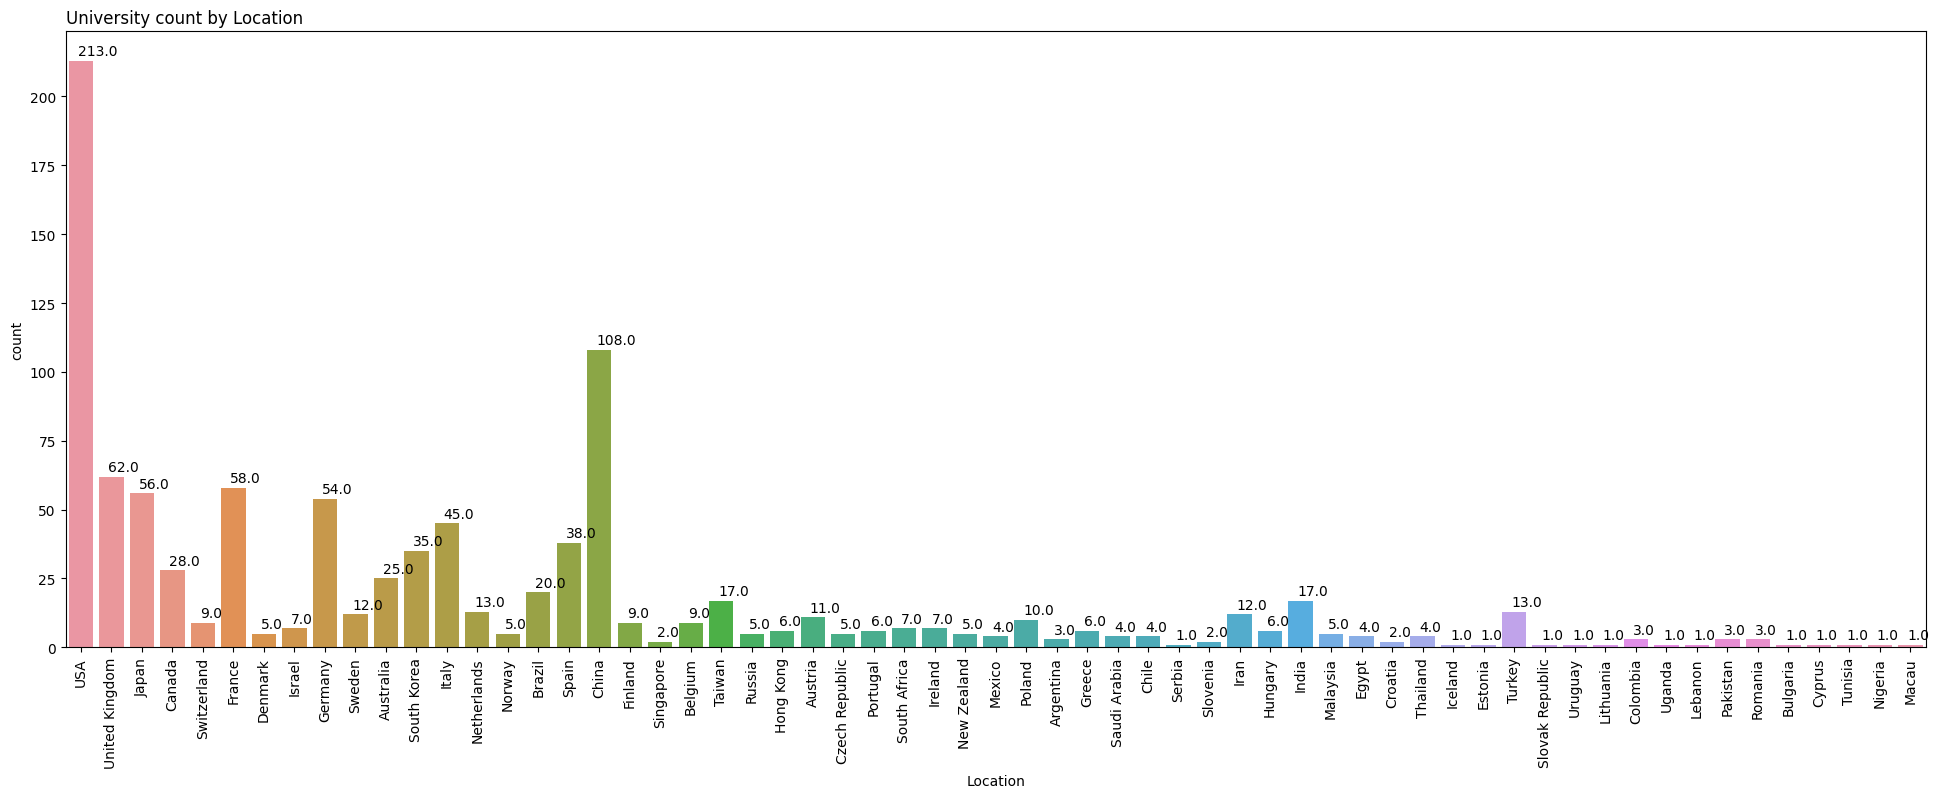

In [87]:
plt.figure(figsize=(24,8)) # setting the fig size
ax = sns.countplot(data= df1, x= 'Location') # setting the plot model
plt.title('University count by Location', c='black', loc='left') # plot title
plt.xticks(rotation=90) # rotating the x labels by 90 d so they are in a better position
for p in ax.patches: # setting to show the numbers of each bar
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))

1. USA with 231 is the top country in the list.
2. secend place is china with 108.
3. 3rd country is UK with 62 universities.
4. least top countries have just one university in the lis. like Macau, Nigeria, Tunisia and more.
5. in this data countries have the mean of 16.39 universities.

In [88]:
(df['Location'].value_counts()).mean()

16.39344262295082

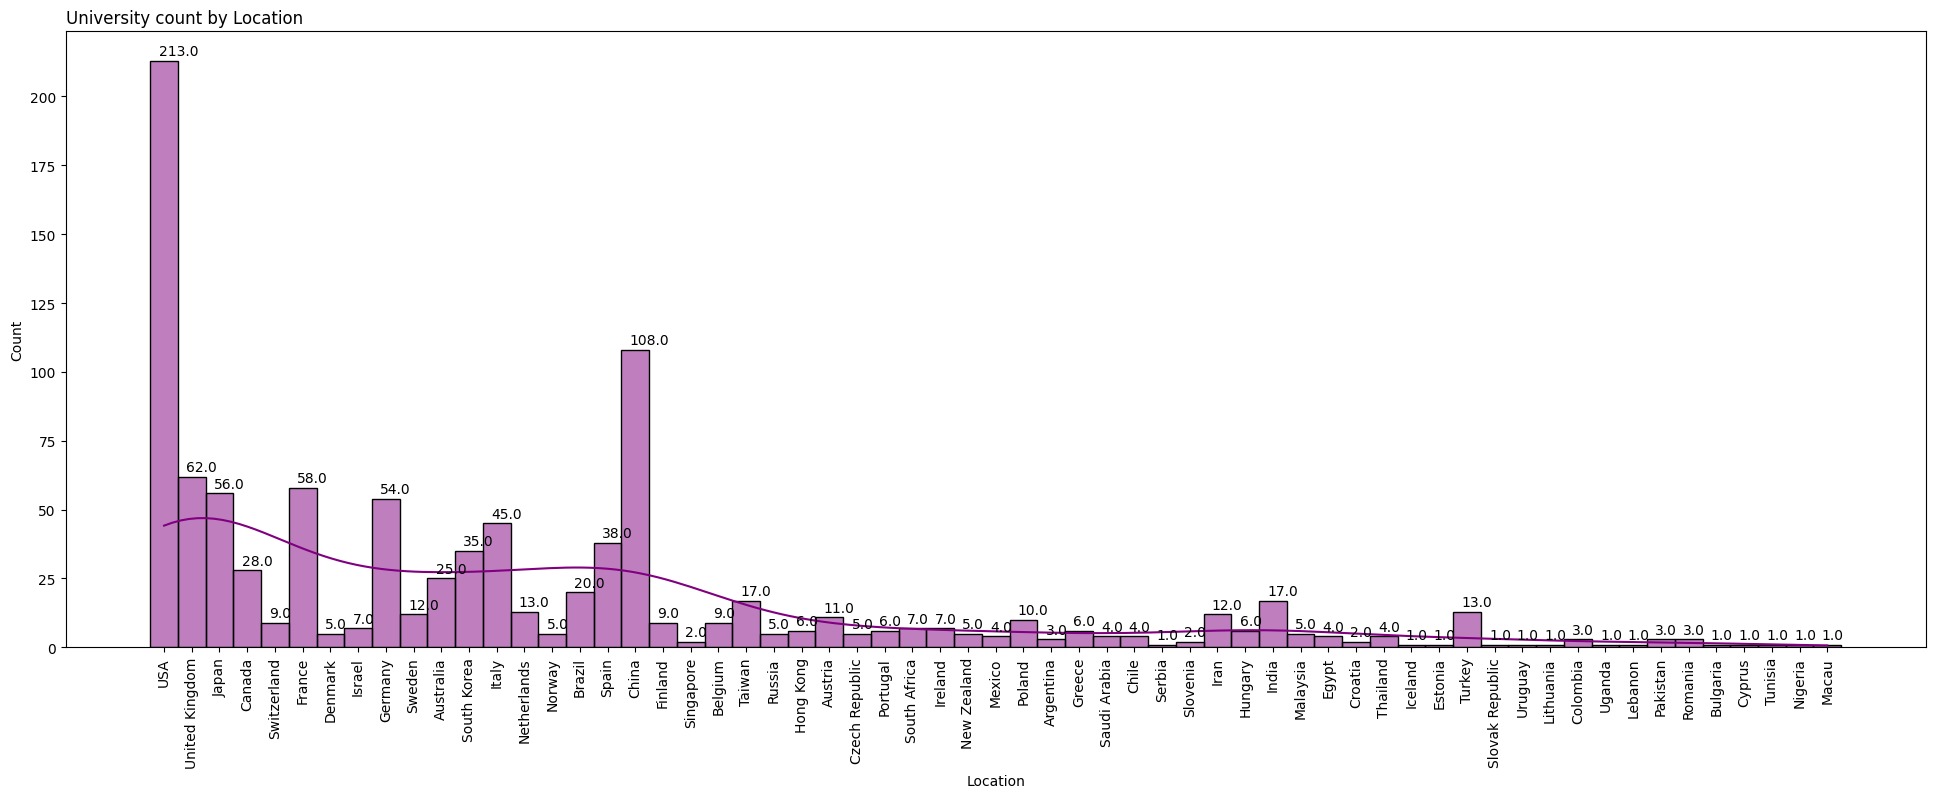

In [89]:
plt.figure(figsize=(24,8)) # setting the fig size
ax = sns.histplot(data= df1, x= 'Location', kde= True, color='purple') # setting the plot model
plt.title('University count by Location', c='black', loc='left') # plot title
plt.xticks(rotation=90) # rotating the x labels by 90 d so they are in a better position
for p in ax.patches: # setting to show the numbers of each bar
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))

1. USA with 231 is the top country in the list.
2. secend place is china with 108.
3. 3rd country is UK with 62 universities.
4. least top countries have just one university in the lis. like Macau, Nigeria, Tunisia and more.
5. in this data countries have the mean of 16.39 universities.

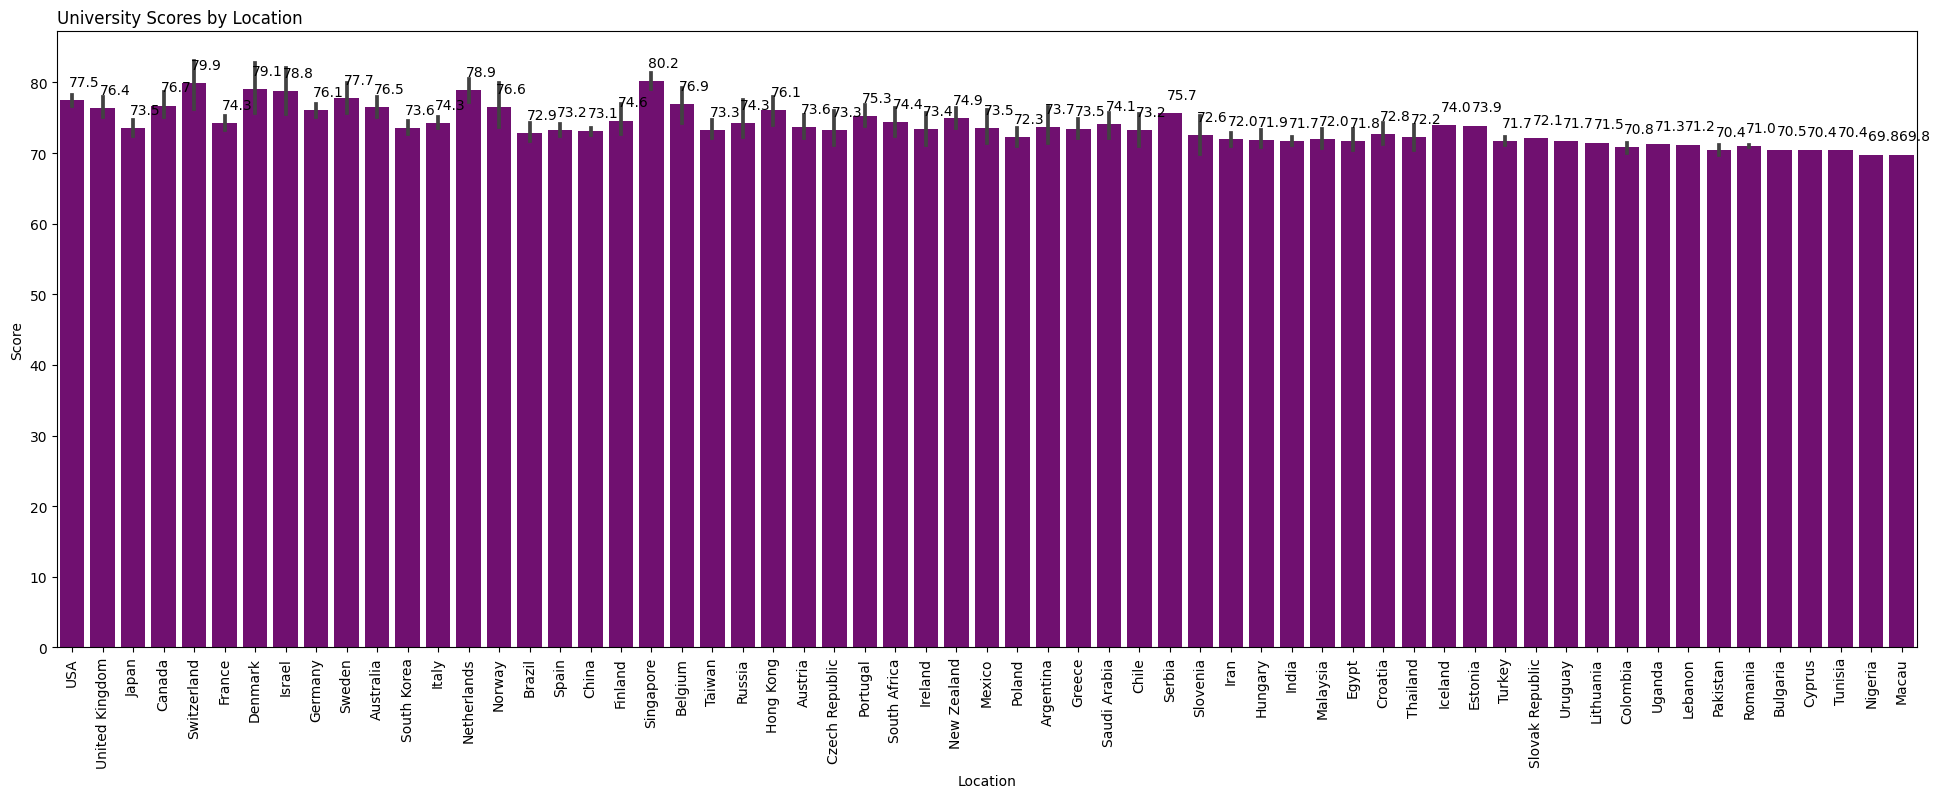

In [90]:
plt.figure(figsize=(24,8)) # setting the fig size
ax = sns.barplot(data= df1, x= 'Location',y= 'Score',color='purple') # setting the plot model
plt.title('University Scores by Location', c='black', loc='left') # plot title
plt.xticks(rotation=90) # rotating the x labels by 90 d so they are in a better position
for p in ax.patches: # setting to show the numbers of each bar
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))

1. Best scored country is Singapore with 80.2 . 
2. Secend country is Switzerland with 79.9 . 
3. 3rd country is Netherlands with score of 78.9 .
4. least scoed country is Macau with 69.8 points.
5. mean of score is 75.03 .

In [91]:
df['Score'].mean()

75.03429999999999

C:\Users\AmirHoein\AppData\Local\Temp\ipykernel_12328\413859753.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.




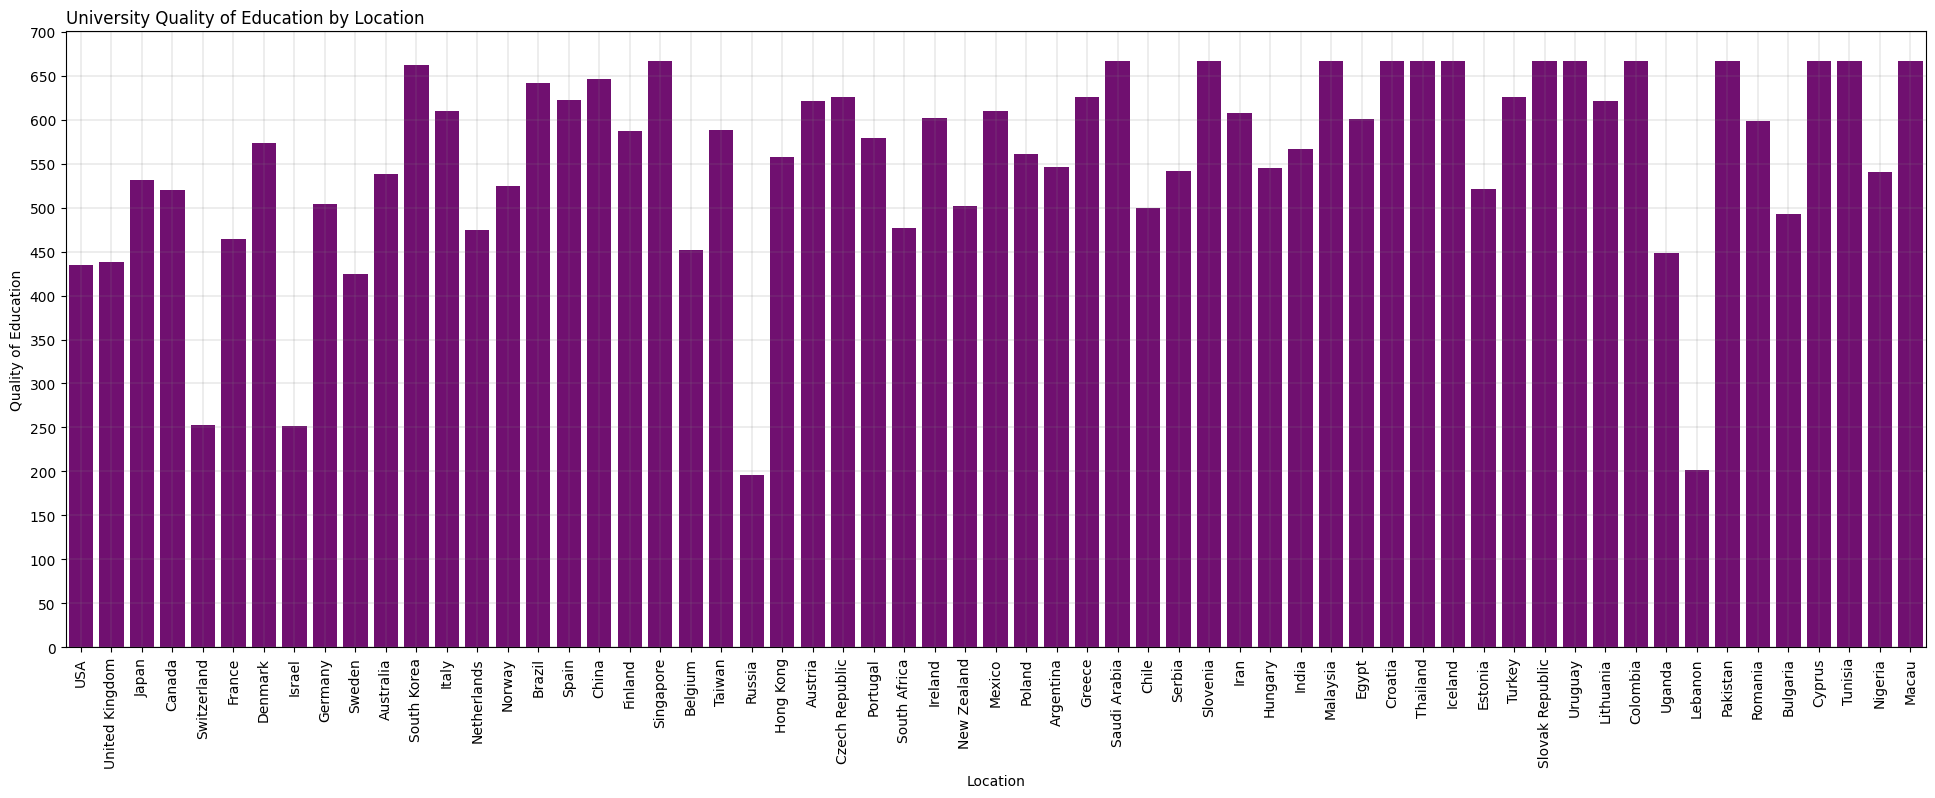

In [92]:
plt.figure(figsize=(24,8)) # setting the fig size
sns.barplot(data= df1, x= 'Location',y= 'Quality of Education',color='purple', ci=False) # setting the plot model
plt.title('University Quality of Education by Location', c='black', loc='left') # plot title
plt.xticks(rotation=90) # rotating the x labels by 90 d so they are in a better position
plt.yticks(np.arange(0, 750, 50)) # setting y axis numbers
plt.grid(linewidth=0.2, color='gray') # setting grid

1. Singapore, South Korea, Saudi Arabia, Slovenia, Malaysia, Croatia, Thailand, Iceland, Slovak Republic, Lithuania, Pakistan, Cyprus, Tunisia and Macau have the best Quality of Education.
2. Russia and Lebanon have the least score in the Quality of Education.
4. Mean of Quality of Education score is 323.4 .


In [93]:
df['Quality of Education'].mean()

323.40694789081886

C:\Users\AmirHoein\AppData\Local\Temp\ipykernel_12328\2815519644.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.




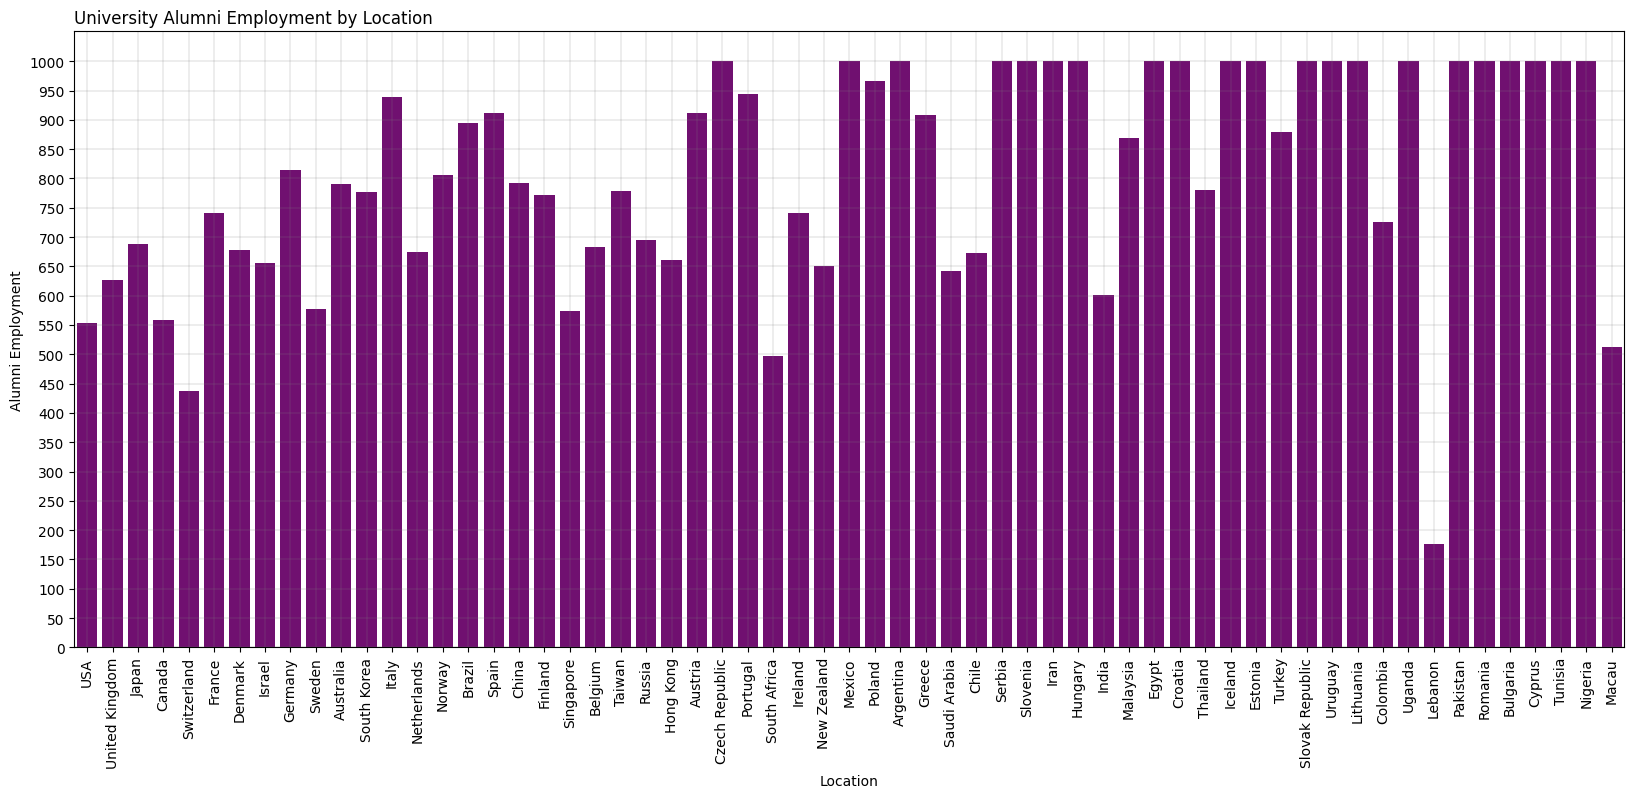

In [94]:
plt.figure(figsize=(20,8)) # setting the fig size
ax = sns.barplot(data= df1,x='Location' ,y= 'Alumni Employment' ,color='purple', ci=False) # setting the plot model
plt.title('University Alumni Employment by Location', c='black', loc='left') # plot title
plt.xticks(rotation=90) # rotating the x labels by 90 d so they are in a better position
plt.yticks(np.arange(0,1010, 50))
plt.grid(linewidth=0.2, color='gray') # setting grid

1. Czech Republic, Mexico, Argantina, Serbia, Slovenia, Iran, Hungry,... scored more in the Alumni Employment. with 1000
2. Top Scored countries like USA, UK ,... are not top.
3. Least scored country is Lebanon with 176.0 and next to it are Macau and South Africa with 512.0 . 
4. Average scorevin this area is 726.52 . 

In [95]:
df1['Alumni Employment'].mean()

726.528

In [96]:
df1[df1['Location']== 'Lebanon']

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
782,783,American University of Beirut,Lebanon,1.0,202.0,176.0,304.0,899.0,862.0,698.0,673.0,71.2


In [97]:
df1[df1['Location']== 'Macau']

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
994,995,University of Macau,Macau,1.0,667.0,512.0,304.0,883.0,816.0,1001.0,1001.0,69.8


In [98]:
#importing this library will help us to save plotly plots
import plotly.io as pio
pio.renderers.default = 'png'

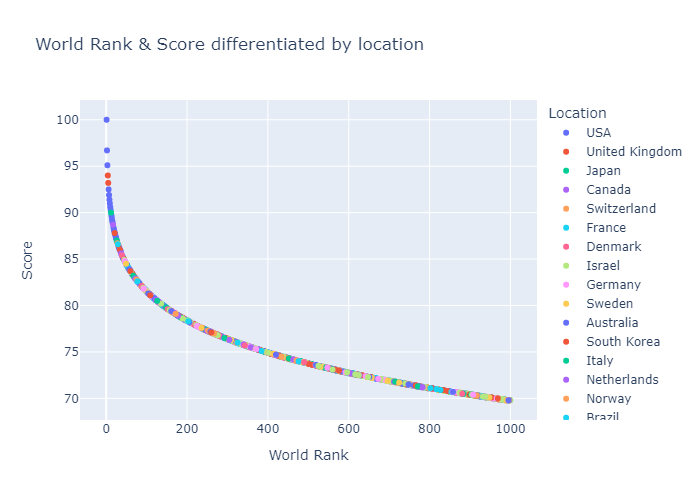

In [117]:
fig2 = px.scatter(df1, x='World Rank', y='Score', color='Location', title='World Rank & Score differentiated by location') # setting the plot type
fig2.show() # showing the plot

1. when Score reduces, World Rank reduces too.
2. Highest Score is 100 and the Lowest is 69.8.
3. The difference between Rand 1 and 2 is more than other ranks.
4. Difference between first 200 ( around 28.6) is more than rest of the values(around 8.6).

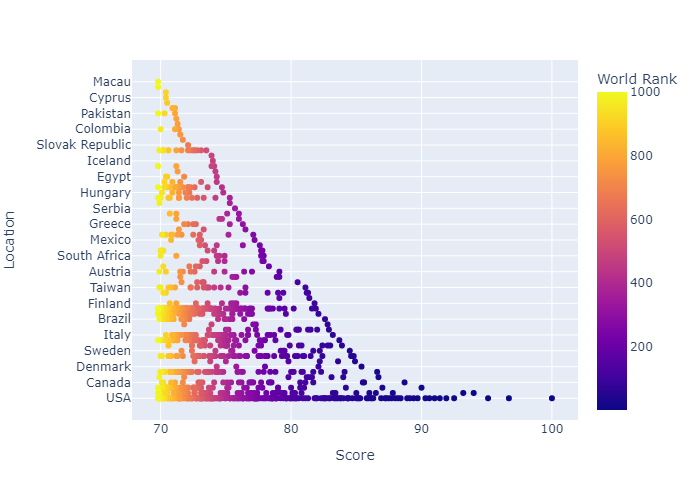

In [100]:
fig = px.scatter(df1, x='Score', y='Location', color='World Rank')
fig.show()

1. USA with 231 universties has the most universities in the data.
2. USA has the most verity in the data scores.
3. North America and Western Europe have the most top university in data.
4. Best university is Harvard with world rank of 1 and the Worst one is Capital Normal University with rank of 1000.

In [101]:
df[df['World Rank']== 1000]

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
999,1000,Capital Normal University,China,108.0,NaN,869.0,NaN,923.0,904.0,889.0,1001.0,69.8


In [102]:
(df1[df1['Location'] == 'USA']).value_counts().sum()

213

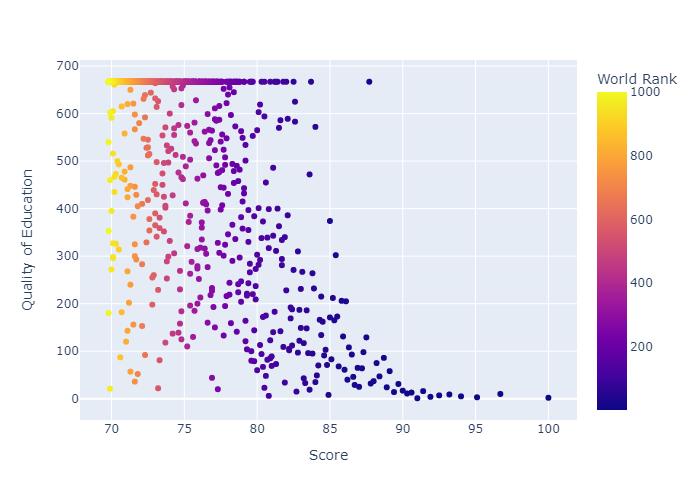

In [103]:
fig = px.scatter(df1, x='Score', y='Quality of Education', color='World Rank')
fig.show()

1. USA has the most verity in data
2. Most of the top universities have a better Quality of Education.
3. values with Quality of Education of 667 are the filled missin values.
4. worest Quality of Education university in top 100 universities is Texas A&M University, College Station with score of 625.0 .
5. Best university is Harvard with score of 1 and the worst one is University of Zaragoza with score of 666.

In [104]:
df[df['Quality of Education']==666]

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
448,449,University of Zaragoza,Spain,14.0,666.0,971.0,NaN,351.0,355.0,582.0,541.0,74.3


In [105]:
df[df['Quality of Education']== 625]

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
77,78,"Texas A&M University, College Station",USA,45.0,625.0,183.0,57.0,85.0,95.0,133.0,101.0,82.6


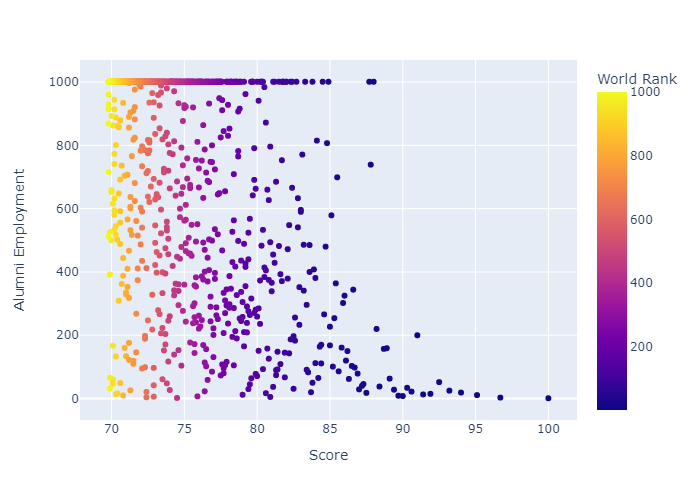

In [106]:
fig = px.scatter(df1, x='Score', y='Alumni Employment', color='World Rank')
fig.show()

1. USA has th most verity.
2. Some of the universities with less score have a better Alumni Employment.
3. Top universities have a great Alumni Employment.
4. universities with value of 1001 in Alumni Employment are the ones that scored < 1000 and we replaced them with 1001.
5. Best university in this plot is Harvard with score of 1 and the worst one is University of Kaiserslautern with score of 997.

In [107]:
df[df['Alumni Employment']== 997]

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
781,782,University of Kaiserslautern,Germany,50.0,NaN,997.0,NaN,911.0,786.0,660.0,541.0,71.2


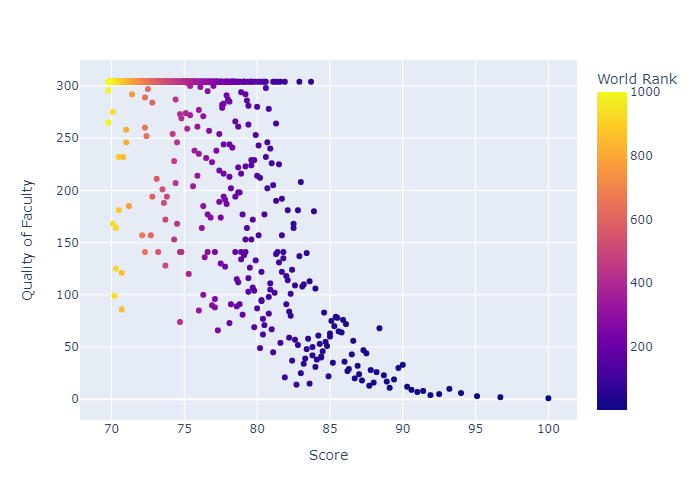

In [108]:
fig = px.scatter(df1, x='Score', y='Quality of Faculty', color='World Rank')
fig.show()

1. Universities with a better Faculty have a better score.
2. Universities with a better Faculty have a world rank.
3. Universities with Quality of Faculty of 304 are the ones we filled.
4. Best faculty belongs to univesity of Harvard and the worst with score of 303 is University of Marburg.

In [109]:
df1[df['Quality of Faculty']== 303]

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
379,380,University of Marburg,Germany,31.0,574.0,1001.0,303.0,439.0,364.0,265.0,460.0,75.2


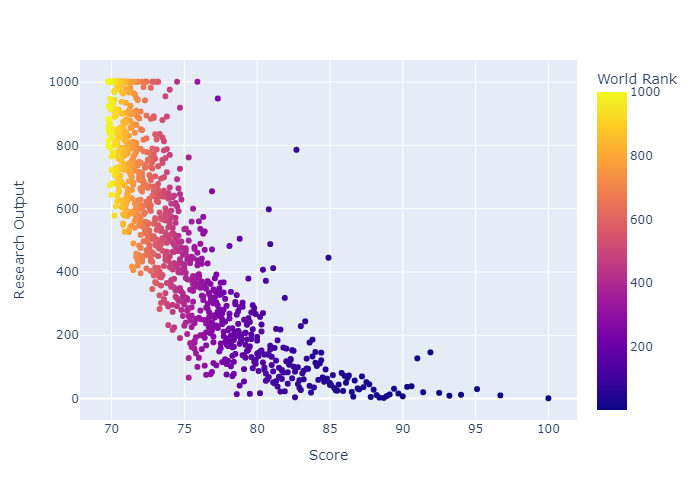

In [110]:
fig = px.scatter(df1, x='Score', y='Research Output', color='World Rank')
fig.show()

1. universities with a better score have a better research outhput.
2. universities with a better world rank have a better research outhput.
3. most of the universities are in the left side of the plot with score of less than 80 and research output of between 15 to 1000.
4. values of 1001 are the replaced ones.
5. best university is Harvard and the worst one is University of Jaén.

In [111]:
df1[df['Research Output']== 1000]

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
899,900,University of Jaén,Spain,34.0,667.0,1001.0,304.0,1000.0,969.0,1001.0,460.0,70.4


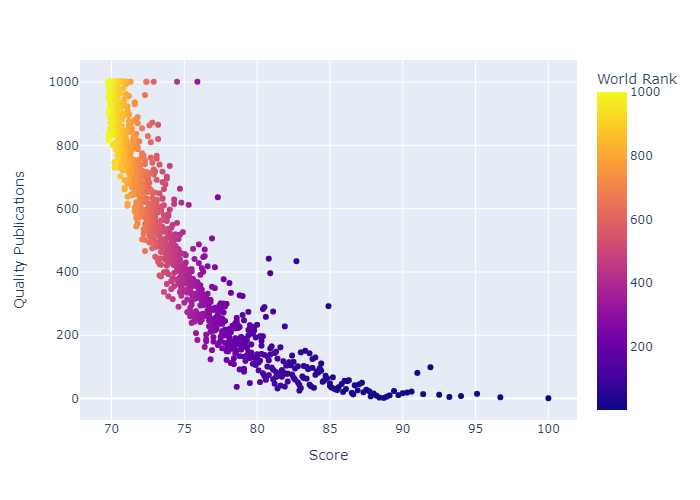

In [112]:
fig = px.scatter(df1, x='Score', y='Quality Publications', color='World Rank')
fig.show()

1. universities with a better score have a better Quality Publication.
2. universities with a better world rank have a better Quality Publication.
3. most of the universities are in the left side of the plot with score of less than 80 and research output of between 37 to 1000.
4. values of 1001 are the replaced ones.
5. best university is Harvard and the worst one is Federal University of Goiás.

In [113]:
df1[df1['Quality Publications']== 997]

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
891,892,Federal University of Goiás,Brazil,18.0,667.0,1001.0,304.0,782.0,997.0,1001.0,673.0,70.5


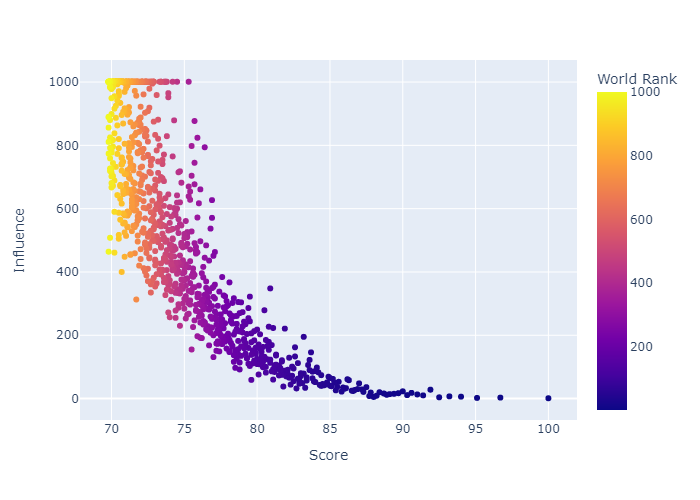

In [114]:
fig = px.scatter(df1, x='Score', y='Influence', color='World Rank')
fig.show()

1. universities with a better score have a better Influence.
2. universities with a better world rank have a better Influence.
3. most of the universities are in the left side of the plot with score of less than 80 and research output of between 59 to 1000.
4. values of 1001 are the replaced ones.
5. best university is Harvard and the worst one is South China Agricultural University.

In [115]:
df1[df1['Influence']== 997]

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
823,824,South China Agricultural University,China,80.0,667.0,1001.0,304.0,723.0,749.0,997.0,898.0,70.9


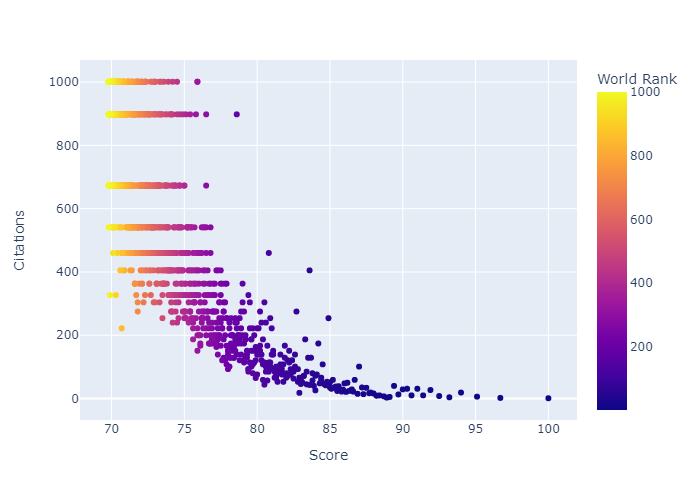

In [116]:
fig = px.scatter(df1, x='Score', y='Citations', color='World Rank')
fig.show()

1. universities with a better score have a better Citations.
2. universities with a better world rank have a better Citations.
3. most of the universities are in the left side of the plot with score of less than 80 and research output of between 65 to 1000.
4. values of 1001 are the replaced ones.
5. best university is Harvard and the worst ones are with score of 898.